In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from datetime import datetime, timezone, timedelta

In [2]:
#user input, multiple
lakes = ["06015200","29007100","31078400","56038200","08004500"]

In [3]:
lakes_data = [pd.read_csv(f"Resources/{x}_catch.csv",converters={"lake_ID": str}) for x in lakes]

In [4]:
lakes_df = pd.concat(lakes_data)
lakes_df["survey_date"] = pd.to_datetime(lakes_df["survey_date"],format="%Y-%m-%d")
lakes_df["numeric_survey_date"] = pd.to_numeric(lakes_df["survey_date"])
lakes_df = lakes_df.sort_values("survey_date")
lakes_df = lakes_df.reset_index(drop=True)

lakes_df.head()

,lake_ID,lake_name,CPUE,averageWeight,gear,gearCount,quartileCount,quartileWeight,species,survey_ID,survey_date,totalCatch,totalWeight,numeric_survey_date
0,31078400,Little Jessie,0.13,1.45,Standard trap nets,15.0,0.3-1.3,0.2-0.8,LMB,106146,1958-06-17,2,2.9,-364262400000000000
1,31078400,Little Jessie,0.11,0.20,Standard gill nets,9.0,NaN,NaN,BLG,106146,1958-06-17,1,0.2,-364262400000000000
2,31078400,Little Jessie,0.13,2.80,Standard trap nets,15.0,0.2-1.1,1.8-3.0,WTS,106146,1958-06-17,2,5.6,-364262400000000000
3,31078400,Little Jessie,0.22,0.20,Standard gill nets,9.0,NaN,NaN,PMK,106146,1958-06-17,2,0.4,-364262400000000000
4,31078400,Little Jessie,10.44,0.38,Standard gill nets,9.0,0.8-6.2,0.6-1.4,TLC,106146,1958-06-17,94,36.1,-364262400000000000


In [5]:
#user input, singular
species = "NOP"

In [6]:
lake_boxplot_cpue_list = []
for lakeid in lakes:
    species_cpue = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["lake_ID"] == lakeid), "CPUE"]
    lake_boxplot_cpue_list.append(species_cpue)

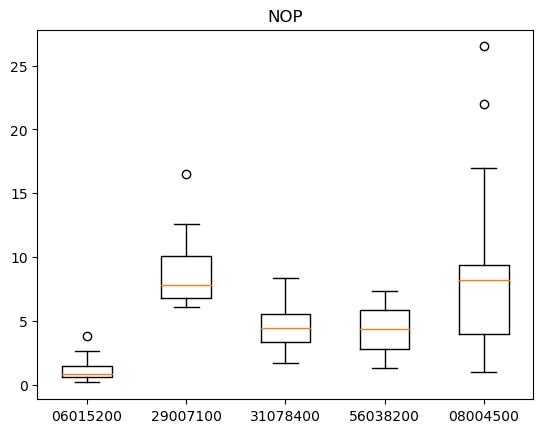

In [7]:
plt.boxplot(lake_boxplot_cpue_list)
labels = lakes
ticks = range(1, len(lakes)+1)
plt.xticks(ticks=ticks, labels=labels)
plt.title(species)
plt.show()

In [8]:
#user input, singular
start_date = np.datetime64('2005-02-25')

In [9]:
#all dates after start date
lake_scatter_cpue_list = []
lake_scatter_survey_date_list = []
lake_scatter_numeric_survey_date_list = []
for lakeid in lakes:
    species_cpue = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["survey_date"] > start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "CPUE"]
    species_survey_date = lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["survey_date"] > start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "survey_date"]
    lake_scatter_numeric_survey_date = (lakes_df.loc[(lakes_df["species"] == species) & \
                                (lakes_df["gear"] == "Standard gill nets") & \
                                (lakes_df["survey_date"] > start_date) & \
                                (lakes_df["lake_ID"] == lakeid), "numeric_survey_date"])
    lake_scatter_cpue_list.append(species_cpue)
    lake_scatter_survey_date_list.append(species_survey_date)
    lake_scatter_numeric_survey_date_list.append(lake_scatter_numeric_survey_date)

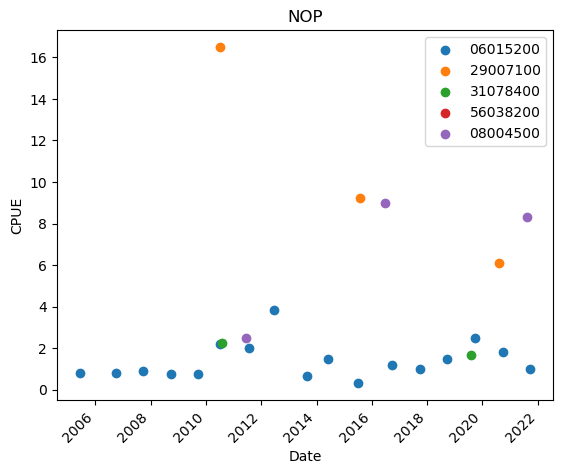

In [10]:
for _ in range(len(lakes)):
    plt.scatter(lake_scatter_survey_date_list[_],lake_scatter_cpue_list[_], label=lakes[_])
plt.title(species)
plt.ylabel("CPUE")
plt.xlabel("Date")
plt.xticks(rotation=45, ha="right")
plt.legend(loc="best")
plt.show()

R value for 06015200 is 0.188172998204951
R value for 29007100 is -0.9765467658102349
R value for 31078400 is -1.0
Survey Data Empty for 56038200
R value for 08004500 is 0.8102869283730649


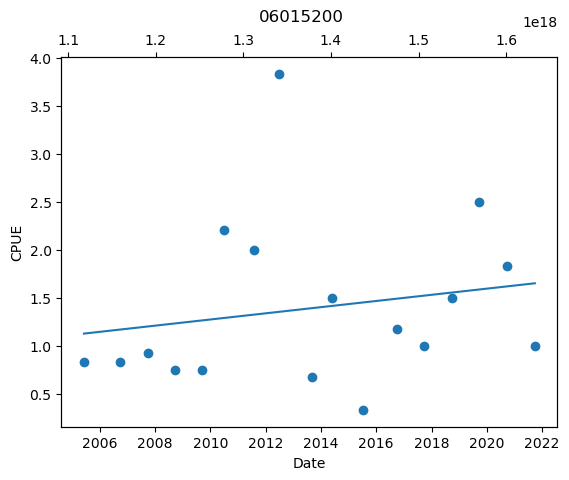

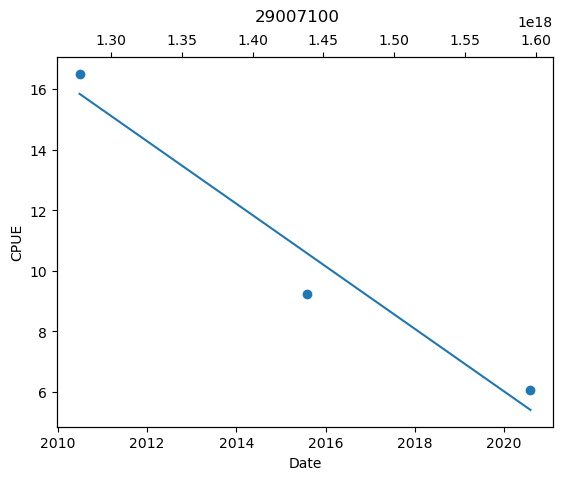

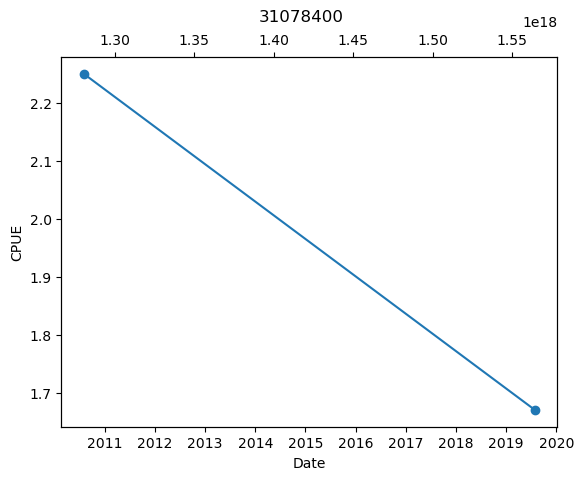

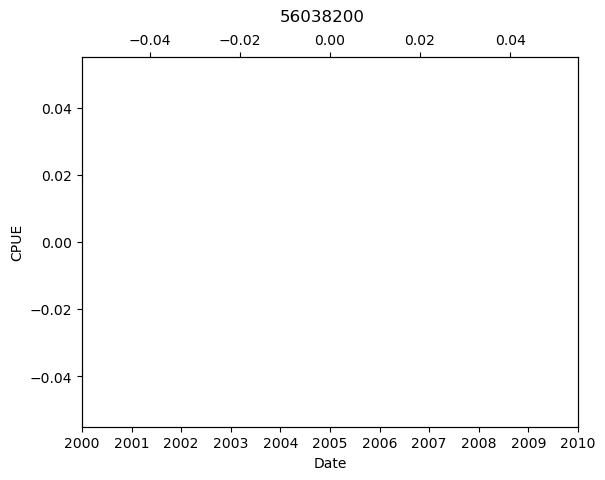

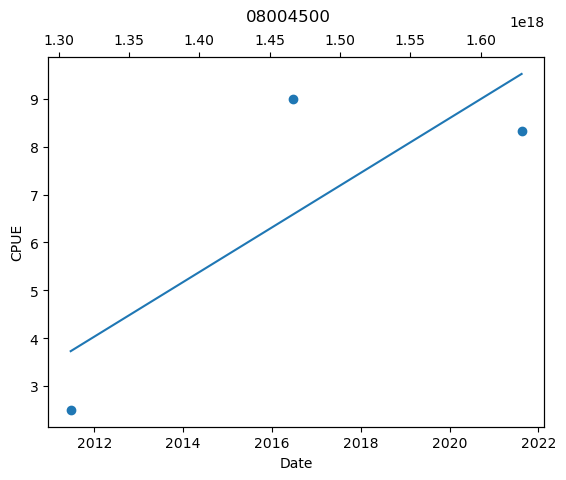

In [11]:
for lake in range(len(lakes)):
    if len(lake_scatter_numeric_survey_date_list[lake]) == 0:
        print(f"Survey Data Empty for {lakes[lake]}")
    elif len(lake_scatter_numeric_survey_date_list[lake]) == 1:
        print(f"Only 1 data point exists for {lakes[lake]}")
    else:
        regression_values = linregress(lake_scatter_numeric_survey_date_list[lake],lake_scatter_cpue_list[lake])
        print(f"R value for {lakes[lake]} is {regression_values.rvalue}")
    fig, ax1 = plt.subplots(1,1)
    fig.suptitle(lakes[lake])
    ax1.scatter(lake_scatter_survey_date_list[lake],lake_scatter_cpue_list[lake], label=lakes[lake])
    ax1.set_ylabel("CPUE")
    ax1.set_xlabel("Date")
    ax2 = ax1.twiny()
    ax2.plot(lake_scatter_numeric_survey_date_list[lake],(regression_values.slope*lake_scatter_numeric_survey_date_list[lake] + regression_values.intercept))

plt.show()